In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import statsmodels.formula.api as smf
from decimal import Decimal

In [4]:
meta = pd.read_csv("tab"", index_col=0)
meta["# of target genes (SCINEIC)"] = meta["Gene"].apply(lambda x: len(x.split(";")))
meta["% of target genes with ChIP-seq peaks"] = meta["number_of_Target_Genes_chip"]/meta["# of target genes (SCINEIC)"]*100
meta["# of biosample (ENCODE)"] = meta["Biosample.term.name"].apply(lambda x: len(x.split(",")))
meta = meta.sort_values("% of target genes with ChIP-seq peaks", ascending=False)
meta = meta.reset_index().drop("index", axis=1).reset_index()

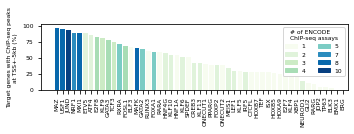

In [5]:
plt.rcParams["figure.figsize"] = (5.5,1.2)
plt.rcParams.update({'font.size': 6})
meta_colors = {1: "#f7fcf0", 2: "#e0f3db", 3: "#ccebc5", 4:"#a8ddb5", 
               5: "#7bccc4", 7:"#2b8cbe", 8:"#0868ac", 10:"#084081"}

c = meta['# of biosample (ENCODE)'].apply(lambda x: meta_colors[x])
plt.bar(meta["Target.gene.symbol"], meta["% of target genes with ChIP-seq peaks"], color=c)
plt.xticks(rotation = 90)
plt.ylabel('Target genes with ChIP-seq peaks\nat TSS+-5kb (%)')
labels = list(meta_colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=meta_colors[label]) for label in labels]
plt.legend(handles, labels, title="# of ENCODE\nChIP-seq assays", ncol=2)
plt.savefig("Fig4f.pdf", bbox_inches='tight')